In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "Decentraland"
SPLITS_FREQ = "W-THU"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-07-13"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-05-27,0.219512,0.203252,0.160976,0.119512,0.107317,0.022683,0.219512,0.269053,0.319390,0.376378,...,0.611007,0.759725,0.987805,0.391880,0.455478,0.455478,0.483450,0.497436,0.497436,0.142648
2021-06-03,0.107143,0.053571,0.078571,0.155357,0.128571,0.019286,0.107143,0.074036,0.121039,0.362251,...,0.797619,1.000000,1.000000,0.394444,0.368750,0.400000,0.400000,0.400000,0.400000,0.137957
2021-06-10,0.558140,0.333333,0.246512,0.174419,0.156589,0.023488,0.558140,0.541148,0.583876,0.640491,...,0.820478,1.000000,1.000000,0.612847,0.638992,0.643621,0.674897,0.674897,0.674897,0.137154
2021-06-17,0.043478,0.130435,0.130435,0.173913,0.130435,0.019565,0.043478,0.112703,0.149678,0.383248,...,0.869565,1.000000,1.000000,0.200000,0.566667,0.691667,0.691667,0.691667,0.691667,0.129433
2021-06-24,0.215686,0.281046,0.235294,0.154902,0.107190,0.016078,0.215686,0.449439,0.529251,0.601345,...,0.975490,1.000000,1.000000,0.821212,0.678836,0.739550,0.755423,0.755423,0.755423,0.138306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.219697,0.227273,0.227273,0.201515,0.191919,0.029621,0.219697,0.259208,0.307695,0.406611,...,0.602116,0.951136,1.000000,0.390312,0.547467,0.594050,0.670034,0.676466,0.676466,0.163770
2023-06-22,0.236486,0.195946,0.183784,0.143919,0.136036,0.024324,0.236486,0.265955,0.300084,0.356482,...,0.488397,0.755448,1.000000,0.487443,0.561280,0.652888,0.701683,0.712130,0.713332,0.165822
2023-06-29,0.214953,0.289720,0.228037,0.223364,0.148910,0.022336,0.214953,0.352264,0.368931,0.569957,...,1.000000,1.000000,1.000000,0.476501,0.583598,0.653157,0.659886,0.659886,0.659886,0.147881


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-05-27,1.0,0.601626,0.414634,0.221951,0.152846,0.022927,1.0,1.0,1.0,1.0,...,0.994371,1.000000,1.0,0.664884,0.933677,0.980926,0.994371,1.000000,1.0,0.135227
2021-06-03,1.0,0.619048,0.385714,0.192857,0.128571,0.019286,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,0.655357,0.983929,1.000000,1.000000,1.000000,1.0,0.137583
2021-06-10,1.0,0.596899,0.413953,0.234884,0.156589,0.023488,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,0.679910,0.923450,0.969315,1.000000,1.000000,1.0,0.134870
2021-06-17,1.0,0.565217,0.391304,0.195652,0.130435,0.019565,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,0.733333,0.939130,1.000000,1.000000,1.000000,1.0,0.131467
2021-06-24,1.0,0.470588,0.313725,0.160784,0.107190,0.016078,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,0.826984,0.961345,0.994398,1.000000,1.000000,1.0,0.135869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,1.0,0.679293,0.506061,0.292424,0.197475,0.029621,1.0,1.0,1.0,1.0,...,0.996786,1.000000,1.0,0.580649,0.866947,0.950594,0.996786,1.000000,1.0,0.157040
2023-06-22,1.0,0.590090,0.421622,0.236486,0.161712,0.024324,1.0,1.0,1.0,1.0,...,0.995293,0.999578,1.0,0.681584,0.909616,0.967603,0.995293,0.999578,1.0,0.156821
2023-06-29,1.0,0.623053,0.439252,0.223364,0.148910,0.022336,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,0.651335,0.921295,0.994215,1.000000,1.000000,1.0,0.145961


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-05-27,0.219512,0.203252,0.160976,0.119512,0.107317,0.022683,0.219512,0.269053,0.319390,0.376378,...,0.759725,0.987805,0.391880,0.455478,0.455478,0.483450,0.497436,0.497436,0.142648,openpop
2021-06-03,0.107143,0.053571,0.078571,0.155357,0.128571,0.019286,0.107143,0.074036,0.121039,0.362251,...,1.000000,1.000000,0.394444,0.368750,0.400000,0.400000,0.400000,0.400000,0.137957,openpop
2021-06-10,0.558140,0.333333,0.246512,0.174419,0.156589,0.023488,0.558140,0.541148,0.583876,0.640491,...,1.000000,1.000000,0.612847,0.638992,0.643621,0.674897,0.674897,0.674897,0.137154,openpop
2021-06-17,0.043478,0.130435,0.130435,0.173913,0.130435,0.019565,0.043478,0.112703,0.149678,0.383248,...,1.000000,1.000000,0.200000,0.566667,0.691667,0.691667,0.691667,0.691667,0.129433,openpop
2021-06-24,0.215686,0.281046,0.235294,0.154902,0.107190,0.016078,0.215686,0.449439,0.529251,0.601345,...,1.000000,1.000000,0.821212,0.678836,0.739550,0.755423,0.755423,0.755423,0.138306,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.219697,0.227273,0.227273,0.201515,0.191919,0.029621,0.219697,0.259208,0.307695,0.406611,...,0.951136,1.000000,0.390312,0.547467,0.594050,0.670034,0.676466,0.676466,0.163770,openpop
2023-06-22,0.236486,0.195946,0.183784,0.143919,0.136036,0.024324,0.236486,0.265955,0.300084,0.356482,...,0.755448,1.000000,0.487443,0.561280,0.652888,0.701683,0.712130,0.713332,0.165822,openpop
2023-06-29,0.214953,0.289720,0.228037,0.223364,0.148910,0.022336,0.214953,0.352264,0.368931,0.569957,...,1.000000,1.000000,0.476501,0.583598,0.653157,0.659886,0.659886,0.659886,0.147881,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-18,1.0,14d,2023-05-18,0.002507,0.128965,25.0,1.0,17.720000,0.256000,0.304000,...,0.217968,0.367656,0.500451,0.619004,0.691548,0.712603,0.183733,itemknn,test,NaN
2023-05-25,1.0,14d,2023-05-25,0.003606,0.099112,19.0,1.0,11.462366,0.397849,0.315412,...,0.490296,0.619946,0.678793,0.740604,0.756181,0.758632,0.153816,itemknn,test,NaN
2023-06-01,1.0,14d,2023-06-01,0.002102,0.081702,13.0,1.0,8.246753,0.350649,0.376623,...,0.339169,0.553594,0.657643,0.711178,0.715219,0.715219,0.145793,itemknn,test,NaN
2023-06-08,1.0,7d,2023-06-08,0.001483,0.064464,12.0,3.0,7.507463,0.417910,0.328358,...,0.390690,0.486071,0.567219,0.608247,0.610704,0.610704,0.142085,itemknn,test,NaN
2023-06-15,8.0,7d,2023-06-15,0.001590,0.060505,16.0,4.0,11.229508,0.344262,0.306011,...,0.326568,0.467602,0.538889,0.598677,0.609788,0.609788,0.150186,itemknn,test,NaN
2023-06-22,1.0,14d,2023-06-22,0.001895,0.104415,17.0,1.0,10.388350,0.252427,0.239482,...,0.555355,0.610403,0.694314,0.732228,0.739221,0.739221,0.155831,itemknn,test,NaN
2023-06-29,1.0,14d,2023-06-29,0.003029,0.062535,10.0,1.0,6.666667,0.350000,0.344444,...,0.453175,0.638690,0.748851,0.754598,0.754598,0.754598,0.141177,itemknn,test,NaN
2023-07-06,1.0,7d,2023-07-06,0.001807,0.117427,21.0,3.0,16.650794,0.317460,0.291005,...,0.245433,0.382363,0.482119,0.614293,0.647295,0.659854,0.185747,itemknn,test,NaN
2023-07-13,4.0,7d,2023-07-13,0.001924,0.072354,23.0,5.0,18.662162,0.283784,0.211712,...,0.517382,0.571252,0.572339,0.622133,0.642291,0.642291,0.161426,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-18,1.0,14d,2023-05-18,0.002507,0.128965,25.0,1.0,17.720000,0.256000,0.304000,...,0.217968,0.367656,0.500451,0.619004,0.691548,0.712603,0.183733,itemknn,test,NaN
2023-05-25,1.0,14d,2023-05-25,0.003606,0.099112,19.0,1.0,11.462366,0.397849,0.315412,...,0.490296,0.619946,0.678793,0.740604,0.756181,0.758632,0.153816,itemknn,test,NaN
2023-06-01,1.0,14d,2023-06-01,0.002102,0.081702,13.0,1.0,8.246753,0.350649,0.376623,...,0.339169,0.553594,0.657643,0.711178,0.715219,0.715219,0.145793,itemknn,test,NaN
2023-06-08,1.0,7d,2023-06-08,0.001483,0.064464,12.0,3.0,7.507463,0.417910,0.328358,...,0.390690,0.486071,0.567219,0.608247,0.610704,0.610704,0.142085,itemknn,test,NaN
2023-06-15,8.0,7d,2023-06-15,0.001590,0.060505,16.0,4.0,11.229508,0.344262,0.306011,...,0.326568,0.467602,0.538889,0.598677,0.609788,0.609788,0.150186,itemknn,test,NaN
2023-06-22,1.0,14d,2023-06-22,0.001895,0.104415,17.0,1.0,10.388350,0.252427,0.239482,...,0.555355,0.610403,0.694314,0.732228,0.739221,0.739221,0.155831,itemknn,test,NaN
2023-06-29,1.0,14d,2023-06-29,0.003029,0.062535,10.0,1.0,6.666667,0.350000,0.344444,...,0.453175,0.638690,0.748851,0.754598,0.754598,0.754598,0.141177,itemknn,test,NaN
2023-07-06,1.0,7d,2023-07-06,0.001807,0.117427,21.0,3.0,16.650794,0.317460,0.291005,...,0.245433,0.382363,0.482119,0.614293,0.647295,0.659854,0.185747,itemknn,test,NaN
2023-07-13,4.0,7d,2023-07-13,0.001924,0.072354,23.0,5.0,18.662162,0.283784,0.211712,...,0.517382,0.571252,0.572339,0.622133,0.642291,0.642291,0.161426,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

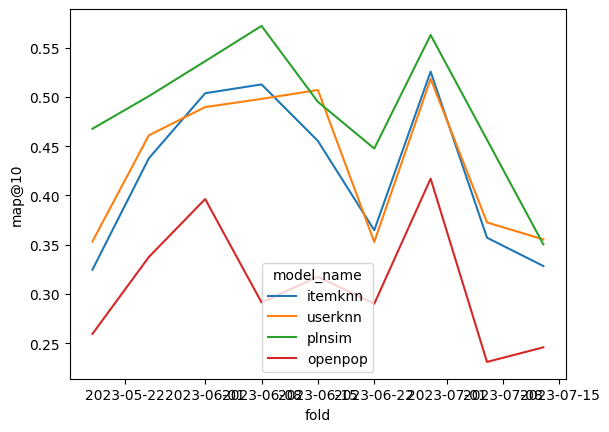

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-05-11,1,14d,2023-05-11,0.002496,0.104145,18,1,9.795918,0.408163,0.360544,0.285714,0.197959,...,0.710398,0.931365,1.0,0.462738,0.725047,0.759164,0.797215,0.797215,0.797215,0.151467
2023-05-18,1,14d,2023-05-18,0.002507,0.128965,25,1,17.720000,0.256000,0.304000,0.321600,0.291200,...,0.437241,0.649508,1.0,0.217968,0.367656,0.500451,0.619004,0.691548,0.712603,0.183733
2023-05-25,1,14d,2023-05-25,0.003606,0.099112,19,1,11.462366,0.397849,0.315412,0.264516,0.203226,...,0.670176,0.817996,1.0,0.490296,0.619946,0.678793,0.740604,0.756181,0.758632,0.153816
2023-06-01,1,7d,2023-06-01,0.005079,0.058996,13,5,9.508197,0.426230,0.469945,0.409836,0.321311,...,0.905514,1.000000,1.0,0.314394,0.523362,0.612826,0.654334,0.658562,0.658562,0.143561
2023-06-08,8,7d,2023-06-08,0.004669,0.064580,12,3,7.507463,0.432836,0.383085,0.340299,0.256716,...,0.993668,1.000000,1.0,0.415724,0.528666,0.610780,0.649704,0.652035,0.652035,0.143835
2023-06-15,1,14d,2023-06-15,0.002537,0.079439,16,1,10.884615,0.346154,0.371795,0.333333,0.267949,...,0.739228,0.979167,1.0,0.375619,0.608941,0.698010,0.751046,0.761147,0.761147,0.153030
2023-06-22,1,14d,2023-06-22,0.001895,0.104415,17,1,10.388350,0.252427,0.239482,0.227184,0.173786,...,0.617599,0.902515,1.0,0.555355,0.610403,0.694314,0.732228,0.739221,0.739221,0.155831
2023-06-29,1,7d,2023-06-29,0.001495,0.045035,10,2,7.266667,0.511111,0.474074,0.400000,0.224444,...,1.000000,1.000000,1.0,0.504348,0.767949,0.854487,0.854487,0.854487,0.854487,0.139926
2023-07-06,4,7d,2023-07-06,0.001859,0.117523,21,3,16.650794,0.365079,0.309524,0.284127,0.262698,...,0.620192,0.883979,1.0,0.299703,0.438313,0.503200,0.624296,0.656921,0.668284,0.189645
